In [1]:
import pandas as pd
from sklearn import metrics
from sklearn.tree import plot_tree
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

from imblearn.under_sampling import RandomUnderSampler

#df = pd.read_csv("training_data_10_28.csv",dtype={'Zipcode':'str'})
df = pd.read_csv("training_data_10_26.csv",dtype={'Zipcode':'str'})
df = df.sample(frac=1)

In [2]:


feature_names = ["Zipcode",  "TMC", "Start_Time", "End_Time",
"Distance(mi)", "Street",
"Side", "City", "County", "State", "Zipcode", "Country", "Timezone",
"Airport_Code", "Weather_Timestamp", "Temperature(F)", "Wind_Chill(F)",
"Humidity(%)", "Pressure(in)", "Visibility(mi)", "Wind_Direction",
"Wind_Speed(mph)", "Precipitation(in)", "Weather_Condition",
"Bump", "Crossing", "Give_Way", "Junction", "No_Exit", "Railway",
"Roundabout", "Station", "Stop", "Traffic_Calming", "Traffic_Signal",
"Turning_Loop", "Sunrise_Sunset", "Civil_Twilight", "Nautical_Twilight",
"Astronomical_Twilight", "A00100", "A00700", "minimum_age", "maximum_age",
"gender"]

'''feature_names = ["Zipcode", "ID", "Source", "TMC", "Start_Time", "End_Time",
"Start_Lat", "Start_Lng", "Distance(mi)", "Description", "Street",
"Side", "City", "County", "State", "Zipcode", "Country", "Timezone",
"Airport_Code", "Weather_Timestamp", "Temperature(F)", "Wind_Chill(F)",
"Humidity(%)", "Pressure(in)", "Visibility(mi)", "Wind_Direction",
"Wind_Speed(mph)", "Precipitation(in)", "Weather_Condition", "Amenity",
"Bump", "Crossing", "Give_Way", "Junction", "No_Exit", "Railway",
"Roundabout", "Station", "Stop", "Traffic_Calming", "Traffic_Signal",
"Turning_Loop", "Sunrise_Sunset", "Civil_Twilight", "Nautical_Twilight",
"Astronomical_Twilight", "A00100", "A00700", "minimum_age", "maximum_age",
"gender"]'''



'feature_names = ["Zipcode", "ID", "Source", "TMC", "Start_Time", "End_Time",\n"Start_Lat", "Start_Lng", "Distance(mi)", "Description", "Street",\n"Side", "City", "County", "State", "Zipcode", "Country", "Timezone",\n"Airport_Code", "Weather_Timestamp", "Temperature(F)", "Wind_Chill(F)",\n"Humidity(%)", "Pressure(in)", "Visibility(mi)", "Wind_Direction",\n"Wind_Speed(mph)", "Precipitation(in)", "Weather_Condition", "Amenity",\n"Bump", "Crossing", "Give_Way", "Junction", "No_Exit", "Railway",\n"Roundabout", "Station", "Stop", "Traffic_Calming", "Traffic_Signal",\n"Turning_Loop", "Sunrise_Sunset", "Civil_Twilight", "Nautical_Twilight",\n"Astronomical_Twilight", "A00100", "A00700", "minimum_age", "maximum_age",\n"gender"]'

In [3]:
x_train = []
y_train = []

In [4]:
#print(df)
#df = df.drop(columns=["Source"])
#df = df.drop(columns=["Description"])

#print(df)
x_train = df[feature_names] #df.drop(columns=["Severity"])

y_train = df.drop(columns=feature_names)
y_train = y_train.loc[:, ~y_train.columns.str.contains('^Unnamed')]



In [5]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
en = preprocessing.OneHotEncoder()

x_train = x_train.reset_index()
y_train = y_train.reset_index()
x_train = x_train.apply(le.fit_transform)

''' classifying a crash of 3 or 4 as severe and 1 or 2 as not severe '''
'''def classify(num):
    if num == 1 or num == 2:
        return 0
    else:
        return 1'''
    
y_train = y_train["Severity"] #.map(classify)

#clf = KNeighborsClassifier() # n_neighbors=5
#clf.fit(x_train, y_train)

In [6]:
#df = pd.read_csv("testing_data_10_28.csv",dtype={'Zipcode':'str'})
df = pd.read_csv("testing_data_10_28.csv",dtype={'Zipcode':'str'})
x_test = []
y_test = []

df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df = df.dropna()

#df = df.drop(columns=["Source", "Description"])

x_test = df[feature_names] #.drop(columns=["Severity"])
y_test = df.drop(columns=feature_names)
y_test = y_test.loc[:, ~y_test.columns.str.contains('^Unnamed')]

le = preprocessing.LabelEncoder()
en = preprocessing.OneHotEncoder()

x_test = x_test.reset_index()
y_test = y_test.reset_index()
x_test = x_test.apply(le.fit_transform)

'''def classify(num):
    if num == 1 or num == 2:
        return 0
    else:
        return 1'''

y_test = y_test["Severity"] #.map(classify)

In [7]:
'''y_pred = clf.predict(x_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1:", metrics.f1_score(y_test, y_pred))'''

'y_pred = clf.predict(x_test)\nprint("Accuracy:", metrics.accuracy_score(y_test, y_pred))\nprint("Precision:", metrics.precision_score(y_test, y_pred))\nprint("Recall:", metrics.recall_score(y_test, y_pred))\nprint("F1:", metrics.f1_score(y_test, y_pred))'

In [8]:
#cm = metrics.confusion_matrix(y_test, y_pred)
#print("Confusion matrix:")
#print(f"TN: {cm[0][0]}")
#print(f"FP: {cm[0][1]}")
#print(f"FN: {cm[1][0]}")
#print(f"TP: {cm[1][1]}")

In [9]:
'''clf = GaussianNB()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

print("Predicted:", y_pred)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
cm = metrics.confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(f"TN: {cm[0][0]}")
print(f"FP: {cm[0][1]}")
print(f"FN: {cm[1][0]}")
print(f"TP: {cm[1][1]}")

y_pred_bayes = y_pred

from sklearn.metrics import precision_score, recall_score, f1_score

print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred))'''

'clf = GaussianNB()\nclf.fit(x_train, y_train)\ny_pred = clf.predict(x_test)\n\nprint("Predicted:", y_pred)\nprint("Accuracy:", metrics.accuracy_score(y_test, y_pred))\ncm = metrics.confusion_matrix(y_test, y_pred)\nprint("Confusion matrix:")\nprint(f"TN: {cm[0][0]}")\nprint(f"FP: {cm[0][1]}")\nprint(f"FN: {cm[1][0]}")\nprint(f"TP: {cm[1][1]}")\n\ny_pred_bayes = y_pred\n\nfrom sklearn.metrics import precision_score, recall_score, f1_score\n\nprint("Precision:", precision_score(y_test, y_pred))\nprint("Recall:", recall_score(y_test, y_pred))\nprint("F1 score:", f1_score(y_test, y_pred))'

In [10]:
''' Decision Tree - ID3 based on Information Gain (IG) '''

from sklearn import tree

# "entropy" for the information gain
clf = tree.DecisionTreeClassifier(criterion="entropy", min_samples_leaf=0.035)
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)
print("Predicted:", y_pred)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
cm = metrics.confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(f"TN: {cm[0][0]}")
print(f"FP: {cm[0][1]}")
print(f"FN: {cm[1][0]}")
print(f"TP: {cm[1][1]}")

print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1 score:", metrics.f1_score(y_test, y_pred))

y_pred_tree = y_pred

Predicted: [0 0 0 ... 1 0 0]
Accuracy: 0.7091998225114629
Confusion matrix:
TN: 34577
FP: 12594
FN: 7067
TP: 13372
Precision: 0.5149811291689131
Recall: 0.6542394441998141
F1 score: 0.5763172071975001


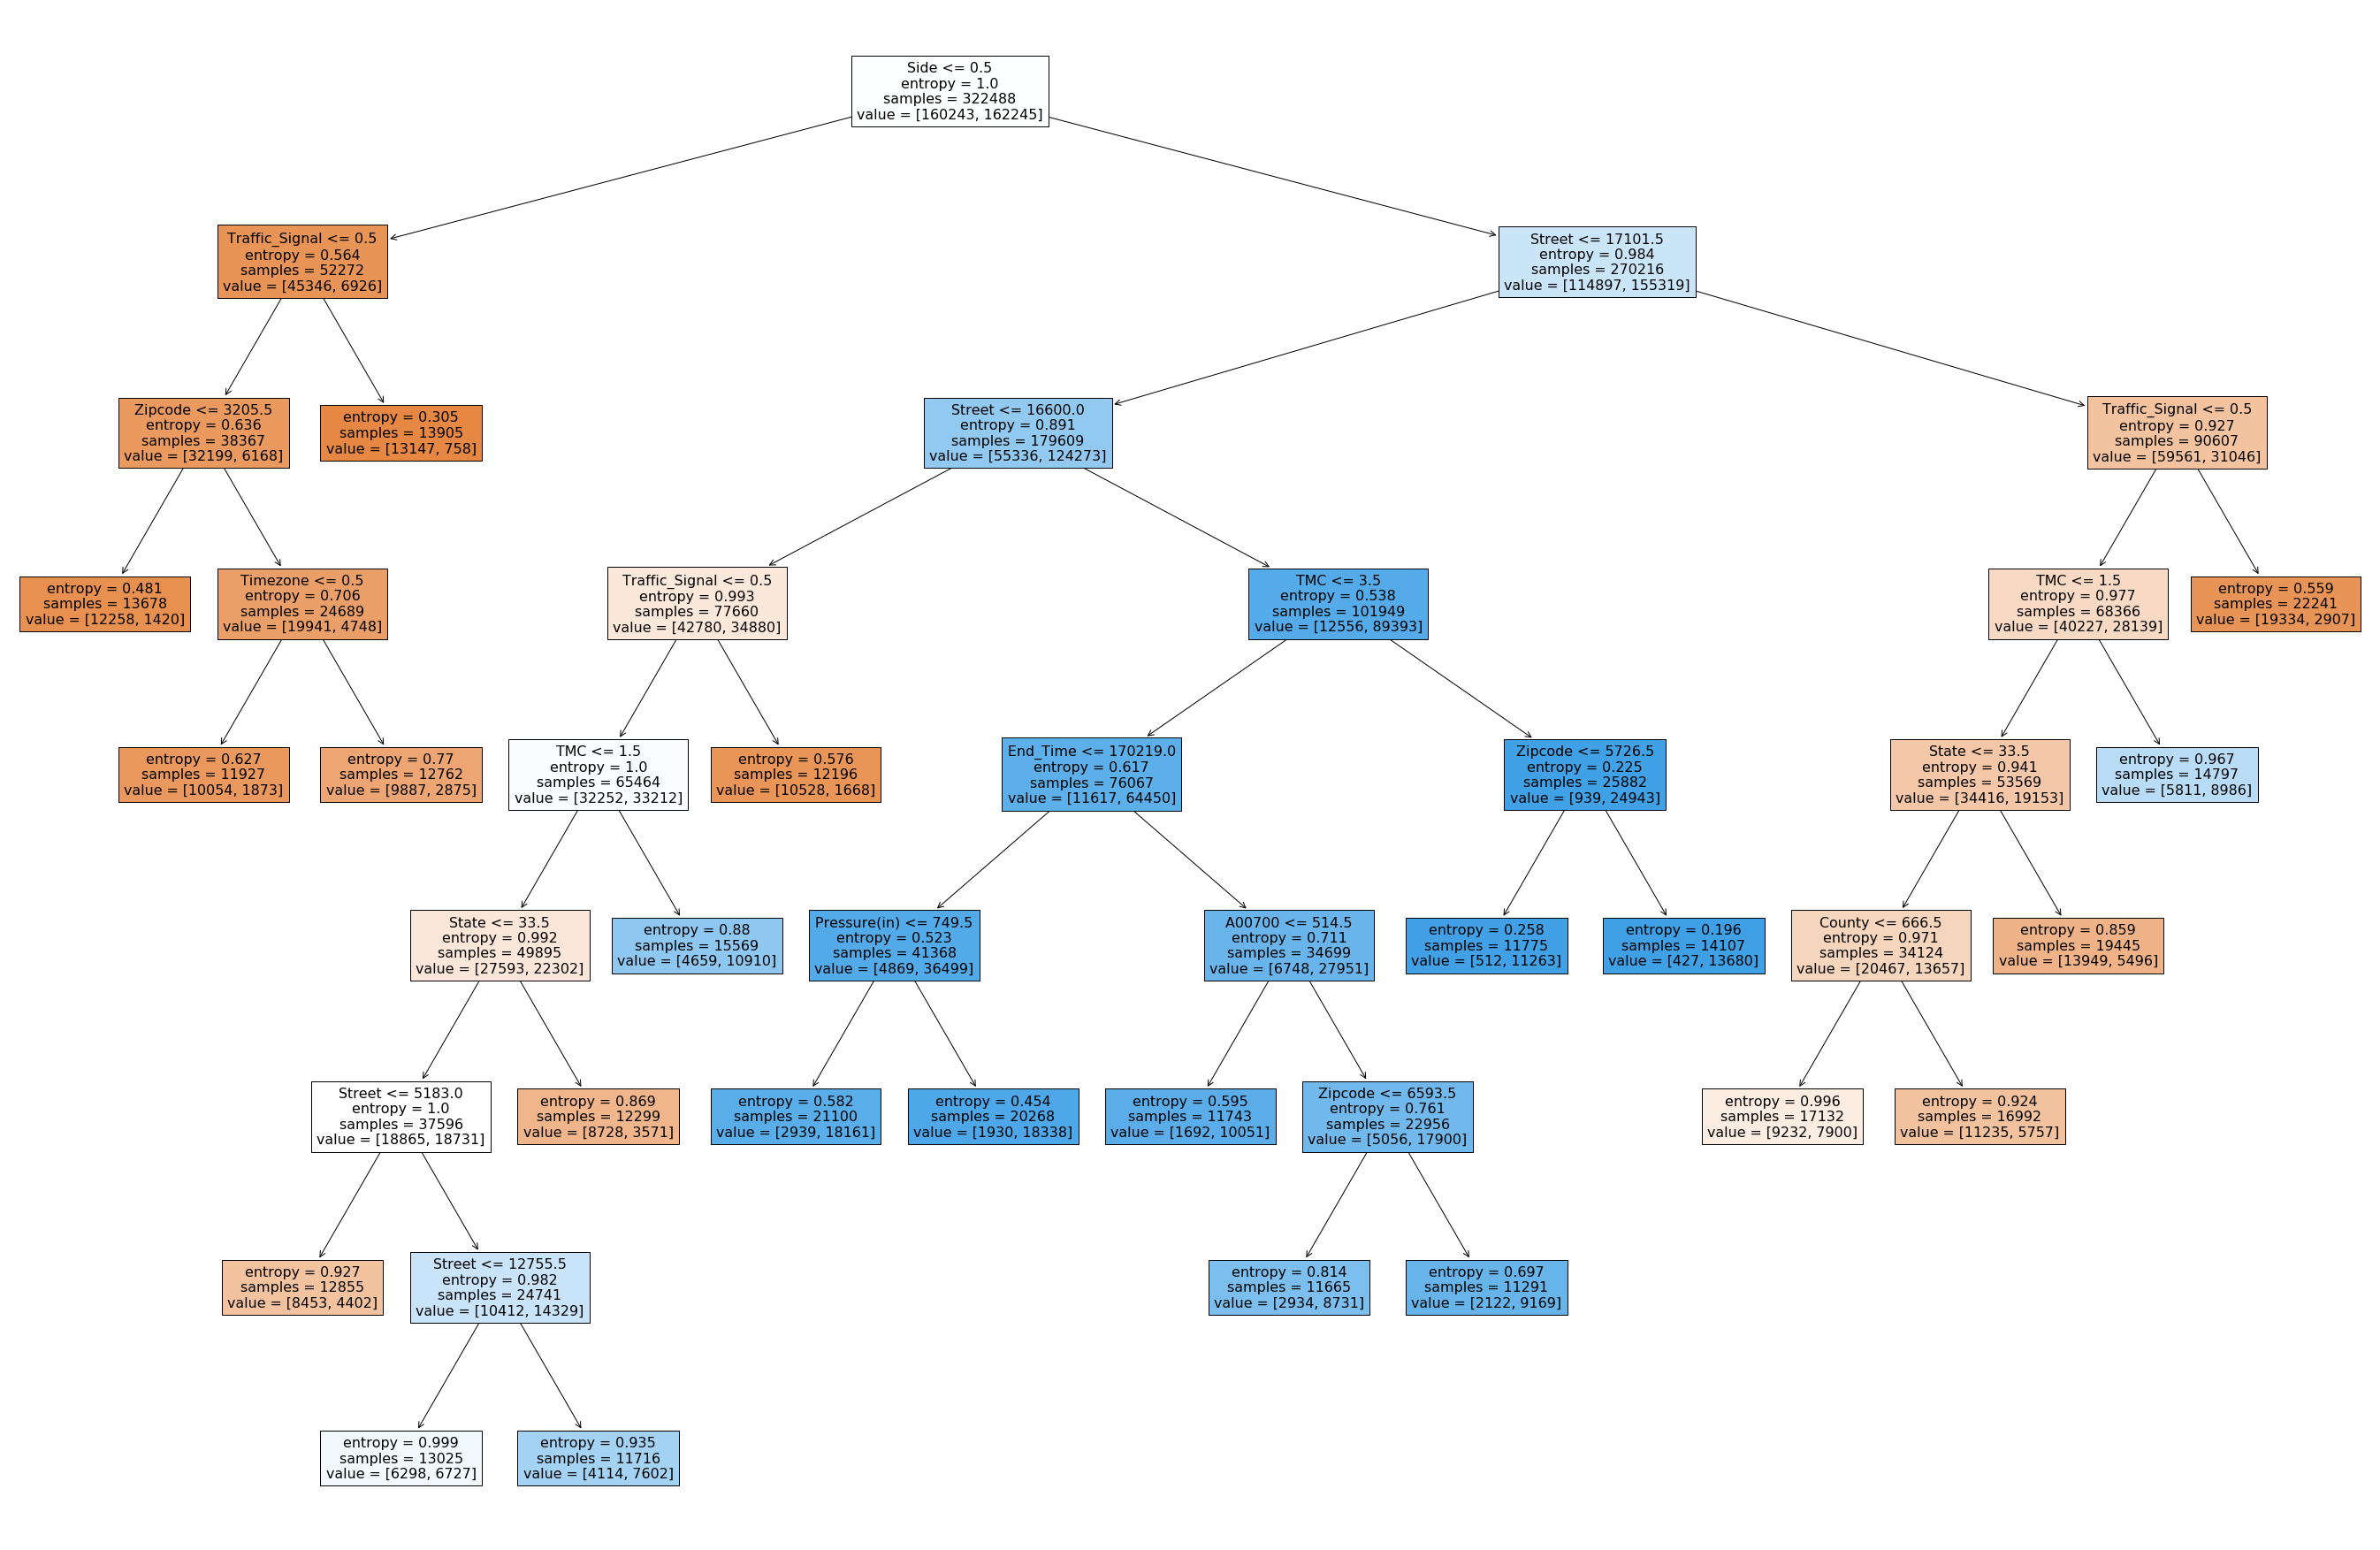

In [16]:
plt.figure(figsize=(48, 32))
plot_tree(clf, filled=True, feature_names=list(x_train.columns))
plt.show()

TMC
